<a href="https://colab.research.google.com/github/sandeshsk12/housing_price/blob/main/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Importing packages

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# importing necessary data

In [53]:
# importing data
data=pd.read_csv('train.csv')

# Exploring data 

In [54]:
# number of rows and columns
print('Number of records: ',data.shape[0])
print()
print('Number of features: ',data.shape[1])

Number of records:  1460

Number of features:  81


In [55]:
# looking at a few records 
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
57,58,60,RL,89.0,11645,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,860,860,GasA,Ex,Y,SBrkr,860,860,0,1720,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,565,TA,TA,Y,0,70,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,196500
887,888,50,RL,59.0,16466,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,7,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,816,816,GasA,TA,Y,SBrkr,872,521,0,1393,0,0,1,1,3,1,TA,8,Typ,0,NaN,Attchd,1955.0,Unf,1,300,TA,TA,Y,121,0,0,0,265,0,NaN,NaN,NaN,0,4,2008,WD,Normal,135500
1174,1175,70,RL,80.0,16560,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,8,1932,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,No,Rec,503,Unf,0,449,952,GasA,TA,Y,SBrkr,1170,1175,0,2345,0,0,2,1,4,1,TA,9,Typ,1,Gd,Detchd,1932.0,Unf,2,360,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,239000
1164,1165,80,RL,NaN,16157,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,SLvl,5,7,1978,1978,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,Gd,TA,Gd,ALQ,680,Rec,391,289,1360,GasA,Ex,Y,SBrkr,1432,0,0,1432,1,0,1,1,2,1,Gd,5,Typ,1,TA,Attchd,1978.0,Unf,2,588,TA,TA,Y,168,180,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,194000
820,821,60,RL,72.0,7226,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,798,798,GasA,Ex,Y,SBrkr,798,842,0,1640,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2003.0,RFn,2,595,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,183000


In [56]:
#using info() to understand the data types of the columns
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> observation
1. There are a total of 1460 enteries with 81 columns
2. Of the 81 columns, 3 are of float type, 35 int type and 43 are object (text) type

In [57]:
# Having a look at the numerical variables
num_cols=data.describe().columns.to_list()
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


> Observation 
1. LotArea appears to be highly skewed.
2. The total rooms above ground is also higly skewed with around 75 % of the houses having less than 7 rooms
3. Almost all of the houses were sold in the 4 years (2006-2010).
4. Sale price has a range of $720100.0

In [58]:
# Looking at object columns
cat_cols=data.describe(include=['O']).columns.to_list()
data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


> Observation
1. Northwest Ames is the most frequent 
2. Most of the houses are under the zone of Residential Low Density
3. 1 Story appears to be very popular
4. Almost all houses have heating Gas forced warm air furnace


In [59]:
# understanding the number of unique values in each column
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [60]:
#looking at only numerical cols, if they are categorical in nature
data[num_cols].nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [61]:
# segregating columns according to data

num_cols_but_categorical=['MSSubClass']
num_discrete_cols=['id','OverallQual','OverallCond',
                   'BsmtFullBath','BsmtHalfBath',
                   'FullBath','HalfBath','BedroomAbvGr',
                   'KitchenAbvGr','TotRmsAbvGrd',
                   'Fireplaces','GarageCars','MoSold']
num_cont_cols=['LotFrontage','LotArea','YearBuilt',
               'YearRemodAdd','MasVnrArea','BsmtFinSF1',
               'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF',
               'GrLivArea','GarageYrBlt','GarageArea',
               'WoodDeckSF','OpenPorchSF','OpenPorchSF',
               'EnclosedPorch','3SsnPorch','ScreenPorch',
               'PoolArea','MiscVal','YrSold','SalePrice']

In [62]:
# We found MSSubClass to be categorical but already encoded, hence we add it to  the list of categorical type
cat_cols.extend(num_cols_but_categorical)

In [63]:
# We drop id from numerical cols as it does not help in our analysis
num_discrete_cols.remove('id')

# Checking for missing values

Before checking for missing values, we need to understand the data first. On going through the data dictionary, we can see that for certain columns, NA is not "unavailable or missing" but rather carries some meaning to it

In [64]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [65]:
# hence we impute proper variables to such columns 
data['Alley'].fillna('No alley access',inplace=True)
data['BsmtQual'].fillna('No Basement',inplace=True)
data['BsmtCond'].fillna('No Basement',inplace=True)
data['BsmtExposure'].fillna('No Basement',inplace=True)
data['BsmtFinType1'].fillna('No Basement',inplace=True)
data['BsmtFinType2'].fillna('No Basement',inplace=True)
data['FireplaceQu'].fillna('No Fireplace',inplace=True)
data['GarageType'].fillna('No Garage',inplace=True)
data['GarageFinish'].fillna('No Garage',inplace=True)
data['GarageQual'].fillna('No Garage',inplace=True)
data['GarageCond'].fillna('No Garage',inplace=True)
data['PoolQC'].fillna('No Pool',inplace=True)
data['Fence'].fillna('No Fence',inplace=True)
data['MiscFeature'].fillna('No Extra feature',inplace=True)

In [66]:
#Dropping rows with more than 70% values missing. 81 * 0.70 = 57 variables
data.dropna(axis=0,how='any',thresh=57,inplace=True)

In [67]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
KitchenQual     0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
dtype: float64

In [68]:
data[(data['GarageType']=='No Garage')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No Fireplace,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,0,0,0,0,0,0,No Pool,No Fence,No Extra feature,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,No Fireplace,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,0,0,102,0,0,0,No Pool,No Fence,No Extra feature,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,No Fireplace,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,No Pool,No Fence,No Extra feature,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,No Fireplace,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,0,0,156,0,0,0,No Pool,MnPrv,No Extra feature,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,No Fireplace,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,No Pool,No Fence,No Extra feature,0,8,2007,WD,Normal,123600
99,100,20,RL,77.0,9320,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,No Fireplace,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,352,0,0,0,0,0,No Pool,No Fence,Shed,400,1,2010,WD,Normal,128950
108,109,50,RM,85.0,8500,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,No Fireplace,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,0,0,144,0,0,0,No Pool,No Fence,No Extra feature,0,8,2007,WD,Normal,115000
125,126,190,RM,60.0,6780,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,No Fireplace,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,53,0,0,0,0,0,No Pool,No Fence,No Extra feature,0,6,2006,WD,Normal,84500
127,128,45,RM,55.0,4388

> Observation
It can be seen that wherever the garage type is "no basement", the garage year built is also missing. As the values are not missing in random. we choose to impute the year built itself as the garage year built

In [69]:
year_built_no_garage=data['YearBuilt'][data['GarageYrBlt'].isna()==True]
data['GarageYrBlt'].fillna(year_built_no_garage,inplace=True)

In [70]:
# It is observed that the data for masvnrtype, masvnrarea and electrical is missing at random. 
#Hence they are imputed with either median or mode as suitable
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0],inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(),inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)



In [71]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

LotFrontage     17.739726
Id               0.000000
BedroomAbvGr     0.000000
GarageYrBlt      0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
dtype: float64

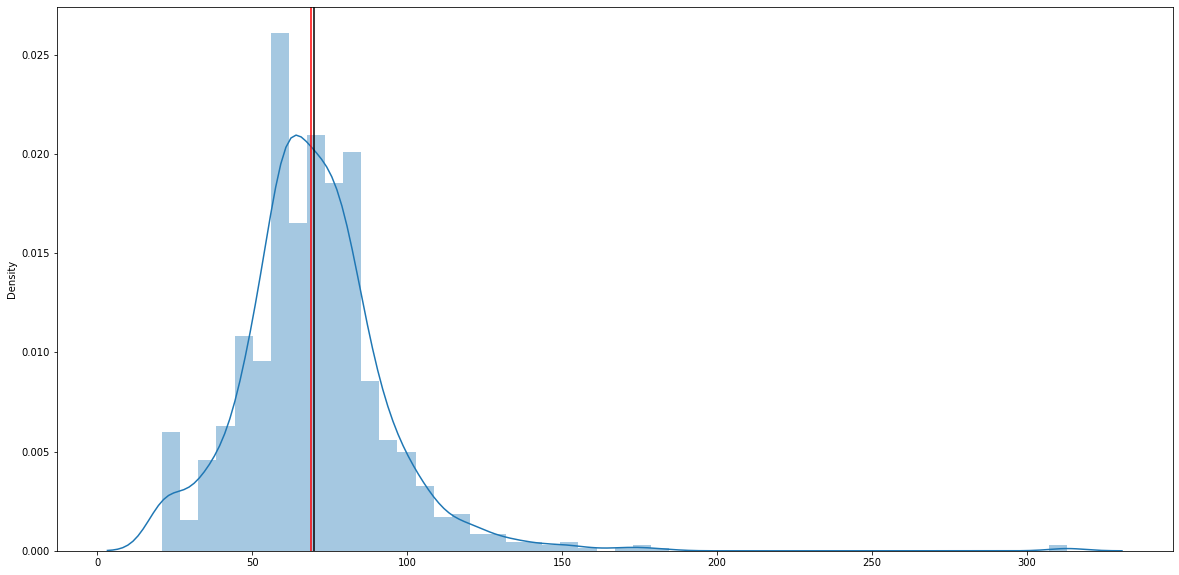

Skewness 2.163569142324884
Kurtosis 17.452867259818404


In [72]:
plt.figure(figsize=(20,10))
sns.distplot(x=data['LotFrontage'])
plt.axvline(data['LotFrontage'].mean(),c='black')
plt.axvline(data['LotFrontage'].median(),c='red')
plt.show()

from scipy import stats
print("Skewness",data['LotFrontage'].skew())
print("Kurtosis",data['LotFrontage'].kurt())

> Observation 
It can be seen that the variable lotfrontage area is positively skewed. Hence we impute the median instead of mean

In [73]:
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

In [74]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

Id              0.0
CentralAir      0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
dtype: float64

> Observation
It can be seen that all the missing values have been dealt with

# Performing EDA

In [75]:
# The following code was used to viualise all the columns and identify important patterns. 
# However, keeping all the graphs would make inferences difficult and the file size too large.
# hence, only the important features are plotted again and observations are explained 

# One could uncomment the below snippet to visualise all graphs 

"""
for col in num_cont_cols:
  plt.figure(figsize=(20,10))
  sns.distplot(x=data[col])
  plt.xlabel(col,fontsize=20)
  plt.title('Distribution of {}'.format(col))
  plt.show()
  print("Skewness",data[col].skew())
  print("Kurtosis",data[col].kurt())
"""

'\nfor col in num_cont_cols:\n  plt.figure(figsize=(20,10))\n  sns.distplot(x=data[col])\n  plt.xlabel(col,fontsize=20)\n  plt.title(\'Distribution of {}\'.format(col))\n  plt.show()\n  print("Skewness",data[col].skew())\n  print("Kurtosis",data[col].kurt())\n'

In [76]:
# The following code was used to viualise all the columns and identify important patterns. 
# However, keeping all the graphs would make inferences difficult and the file size too large.
# hence, only the important features are plotted again and observations are explained 

# One could uncomment the below snippet to visualise all graphs 
"""
for col in cat_cols:
  plt.figure(figsize=(20,10))
  data[col].value_counts().plot(kind='bar')
  plt.xlabel(col,fontsize=15)
  #plt.title('Distribution of {}'.format(col))
  plt.show()
"""

"\nfor col in cat_cols:\n  plt.figure(figsize=(20,10))\n  data[col].value_counts().plot(kind='bar')\n  plt.xlabel(col,fontsize=15)\n  #plt.title('Distribution of {}'.format(col))\n  plt.show()\n"

In [77]:
# The following code was used to viualise all the columns and identify important patterns. 
# However, keeping all the graphs would make inferences difficult and the file size too large.
# hence, only the important features are plotted again and observations are explained 

# One could uncomment the below snippet to visualise all graphs 
"""
for col in num_discrete_cols:
  plt.figure(figsize=(20,10))
  data[col].value_counts().plot(kind='bar')
  plt.xlabel(col,fontsize=15)
  #plt.title('Distribution of {}'.format(col))
  plt.show()
"""

"\nfor col in num_discrete_cols:\n  plt.figure(figsize=(20,10))\n  data[col].value_counts().plot(kind='bar')\n  plt.xlabel(col,fontsize=15)\n  #plt.title('Distribution of {}'.format(col))\n  plt.show()\n"

In [78]:
# Distribution of data in categorical columns in text format 
for col in cat_cols:
  print(col)
  print(data[col].value_counts()*100/len(data))
  print('='*70)

MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Street
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
Alley
No alley access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411


In [79]:
data=pd.get_dummies(data)

In [111]:
features=data.drop('SalePrice',axis=1)
target=data['SalePrice']


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target, test_size=0.3,random_state=42)



In [112]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=150, max_depth=3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=150, random_state=42)

In [113]:
regression_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
regression_rf.fit(X_train, y_train)
regression_rf.oob_score_

0.7966978157394502

In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [130]:
rfe = RFE(estimator=linreg, n_features_to_select=25)

In [131]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [132]:
# Gives the rank of each column
rfe.ranking_

array([274, 259, 258, 272,  38, 161, 255, 256, 265, 268, 269, 273, 264,
       252, 251, 253, 248,  42, 172,  13,  57, 130,  78,  80,  50, 257,
        23, 262, 267, 271, 266, 263, 261, 100, 270, 254, 260,  55,  77,
       228, 191, 144,  68, 101, 114, 115,  48,  95, 207,  47,  94,  76,
        59, 189, 213,  12,  11, 165,  45,  64,  33, 166, 170, 176,  20,
       135, 160, 203, 154, 249, 136,  14,  70,  54,  67, 145,  60,  69,
        88,  58,   6,  18, 112, 173, 155, 204, 210,   9, 128,  31,  25,
       182,  86, 126,  85,  53, 181, 208, 209,  28,  56, 123, 275,  10,
         1,  46, 277,  17, 137, 168,  51,  52,  66,  79,  75, 158, 153,
       234, 125, 124,  49, 184, 141, 250,  36, 164,   4,   2, 276,   1,
         3,   1,   1,   1, 212,  34,  87,  27, 102,  29, 119, 278, 229,
       148,  26, 198, 120,  82,  40, 192,  35,  83, 117,  96,  30, 118,
        32, 149,  43, 220,  21, 219, 121,  81, 156, 218, 241, 196, 167,
        24, 111,  91,  90, 159, 243, 174, 244, 175,  65, 206, 20

In [133]:

# Gives the top n features
imp=X_train.columns[rfe.support_]
cat_cols_temp=cat_cols.copy()

In [134]:
for i in imp:
  if i in num_cont_cols:
    print('cont',i)
  elif  i in num_discrete_cols:
    print('discrete',i)
  elif i.split('_')[0] in cat_cols_temp:
    print('categorical',i.split('_')[0] )
    cat_cols_temp.remove(i.split('_')[0])


categorical Condition2
categorical RoofMatl
categorical GarageFinish
categorical GarageQual
categorical GarageCond
categorical PoolQC
categorical MiscFeature


In [135]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']